In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [12]:
url = "https://raw.githubusercontent.com/luminati-io/TikTok-dataset-samples/main/tiktok-profiles.csv"
df = pd.read_csv(url)

In [13]:
print(df.info())
print(df.head())
print("Total profiles:", df.shape[0])
print("Verified accounts:", df["is_verified"].sum() if "is_verified" in df.columns else "N/A")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               1000 non-null   object 
 1   nickname                 1000 non-null   object 
 2   biography                995 non-null    object 
 3   awg_engagement_rate      1000 non-null   float64
 4   comment_engagement_rate  1000 non-null   float64
 5   like_engagement_rate     1000 non-null   float64
 6   bio_link                 85 non-null     object 
 7   predicted_lang           1000 non-null   object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

In [14]:
for col in ["awg_engagement_rate", "like_engagement_rate", "comment_engagement_rate"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [15]:
df["region"] = df.get("region", "").fillna("Unknown")
df["predicted_lang"] = df.get("predicted_lang", "").fillna("Unknown")

### Verified vs Non-verified profiles

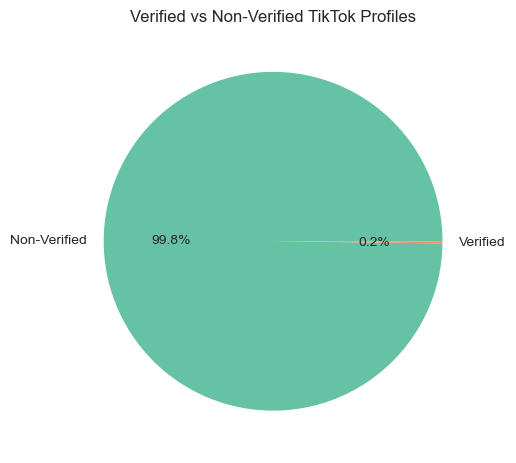

In [16]:
if "is_verified" in df.columns:
    plt.figure()
    df["is_verified"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["Non-Verified","Verified"])
    plt.title("Verified vs Non-Verified TikTok Profiles")
    plt.ylabel("")
    plt.show()

### Distribution of Followers

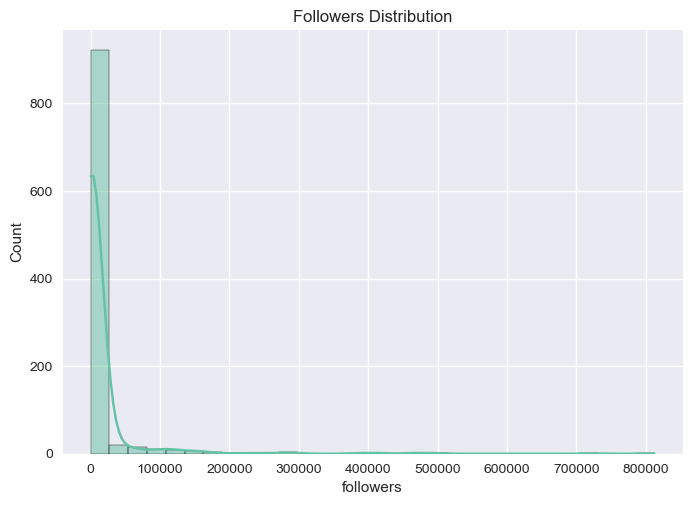

In [17]:
if "followers" in df.columns:
    plt.figure()
    sns.histplot(df["followers"], bins=30, kde=True)
    plt.title("Followers Distribution")
    plt.show()

### Average Engagement Rate by Verification Status

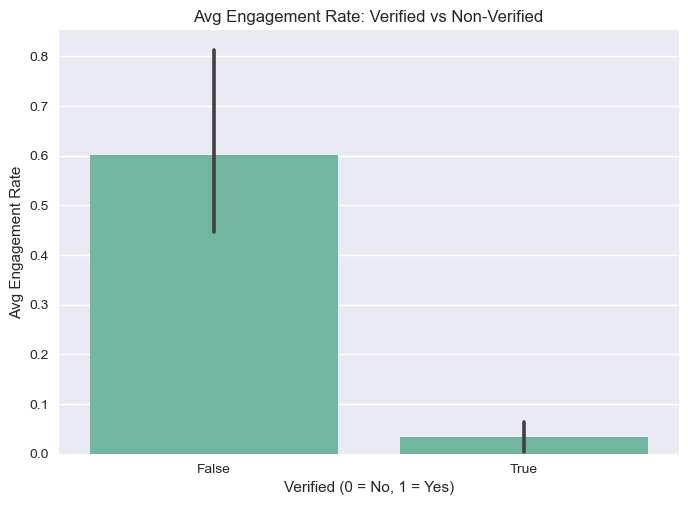

In [18]:
if "awg_engagement_rate" in df.columns and "is_verified" in df.columns:
    plt.figure()
    sns.barplot(x="is_verified", y="awg_engagement_rate", data=df)
    plt.title("Avg Engagement Rate: Verified vs Non-Verified")
    plt.xlabel("Verified (0 = No, 1 = Yes)")
    plt.ylabel("Avg Engagement Rate")
    plt.show()

#### Top regions by count

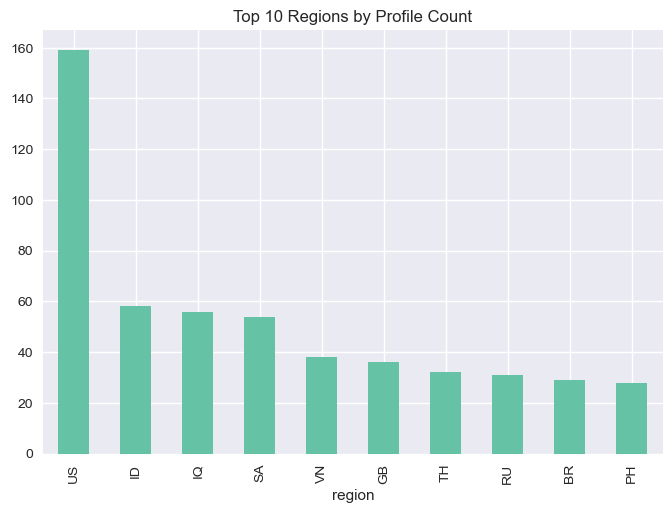

In [19]:
if "region" in df.columns:
    top_regions = df["region"].value_counts().head(10)
    plt.figure()
    top_regions.plot(kind="bar")
    plt.title("Top 10 Regions by Profile Count")
    plt.show()

### Preferred Language Distribution

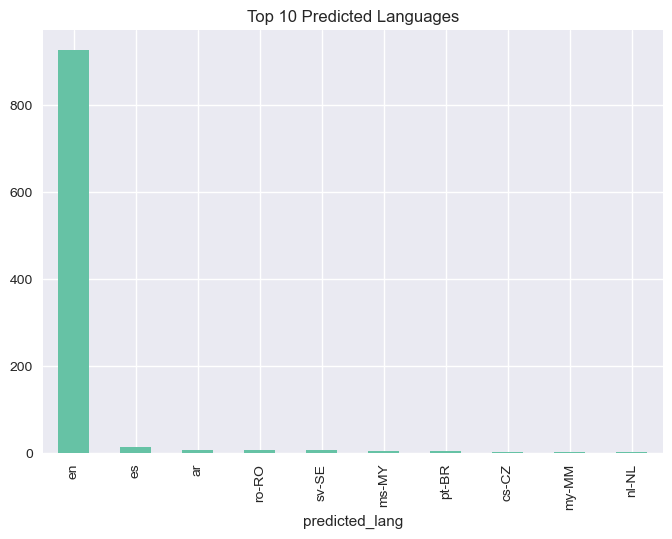

In [20]:
if "predicted_lang" in df.columns:
    lang_counts = df["predicted_lang"].value_counts().head(10)
    plt.figure()
    lang_counts.plot(kind="bar")
    plt.title("Top 10 Predicted Languages")
    plt.show()

### Word Cloud of Region Labels (visual motif)

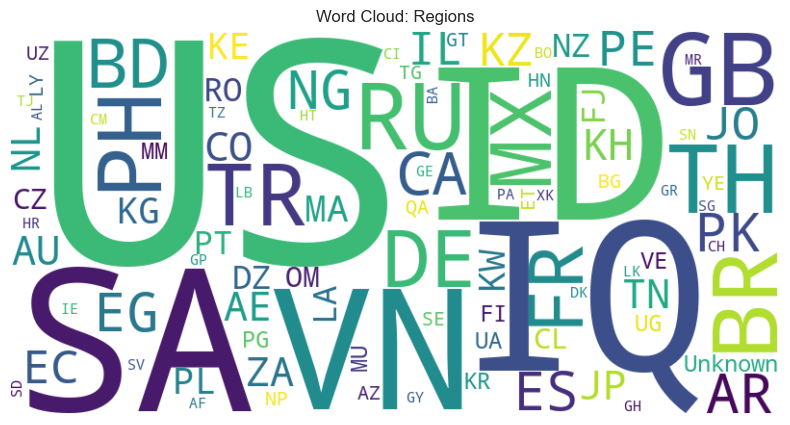

In [21]:
text = " ".join(df["region"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Regions")
plt.show()

### Engagement Rate vs Followers (scatter)

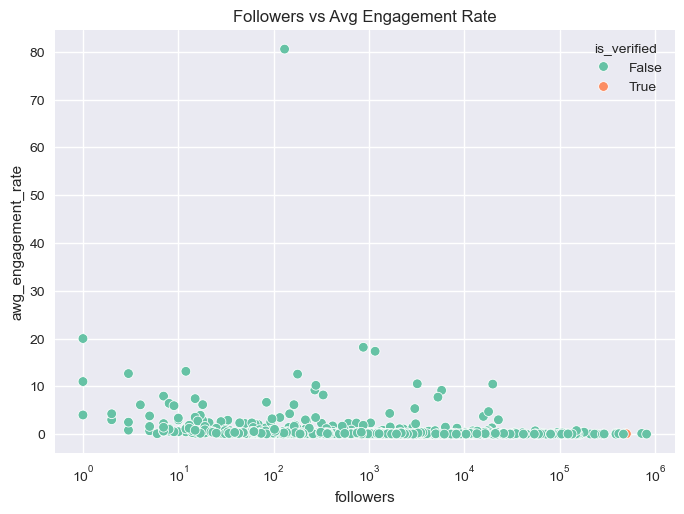

In [22]:
if "followers" in df.columns and "awg_engagement_rate" in df.columns:
    plt.figure()
    sns.scatterplot(x="followers", y="awg_engagement_rate", hue="is_verified" if "is_verified" in df.columns else None, data=df)
    plt.title("Followers vs Avg Engagement Rate")
    plt.xscale("log")
    plt.show()

### Correlation Heatmap of Engagement Metrics

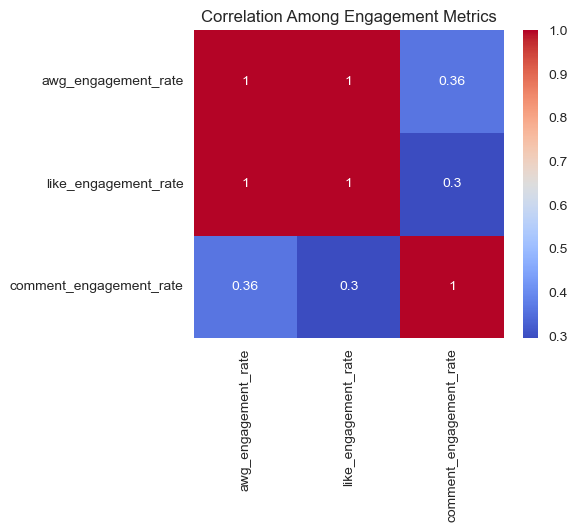

In [23]:
metrics = [c for c in ["awg_engagement_rate", "like_engagement_rate", "comment_engagement_rate"] if c in df.columns]
if metrics:
    plt.figure(figsize=(5,4))
    sns.heatmap(df[metrics].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Among Engagement Metrics")
    plt.show()

### Followers vs Engagement Rate Distribution (hexbin)

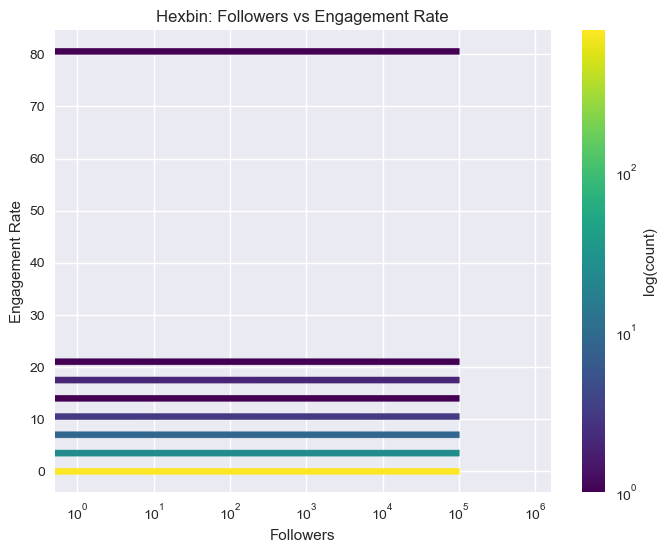

In [34]:
if "followers" in df.columns and "awg_engagement_rate" in df.columns:
    plt.figure(figsize=(8,6))
    plt.hexbin(df["followers"], df["awg_engagement_rate"], gridsize=40, cmap="viridis", bins="log")
    plt.colorbar(label="log(count)")
    plt.title("Hexbin: Followers vs Engagement Rate")
    plt.xlabel("Followers")
    plt.ylabel("Engagement Rate")
    plt.xscale("log")
    plt.show()

### Engagement Rate by Region (top 10 regions)

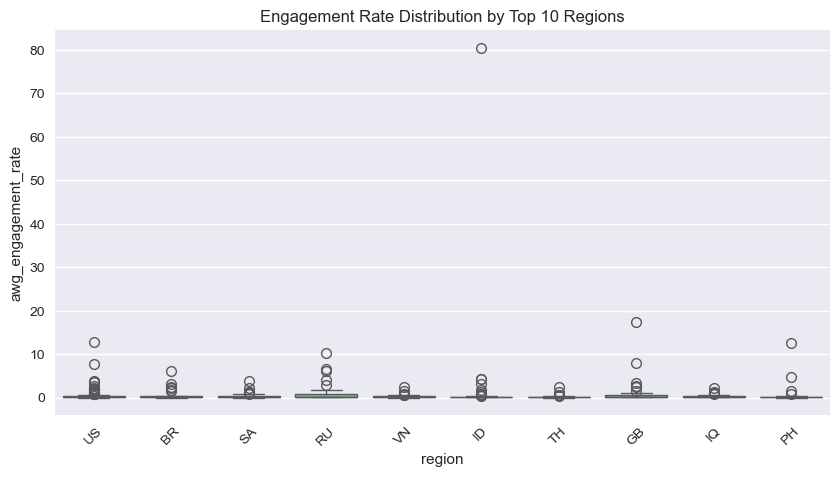

In [35]:
if "region" in df.columns and "awg_engagement_rate" in df.columns:
    plt.figure(figsize=(10,5))
    top_regions = df["region"].value_counts().head(10).index
    sns.boxplot(x="region", y="awg_engagement_rate", data=df[df["region"].isin(top_regions)])
    plt.title("Engagement Rate Distribution by Top 10 Regions")
    plt.xticks(rotation=45)
    plt.show()

### Distribution of Following Count

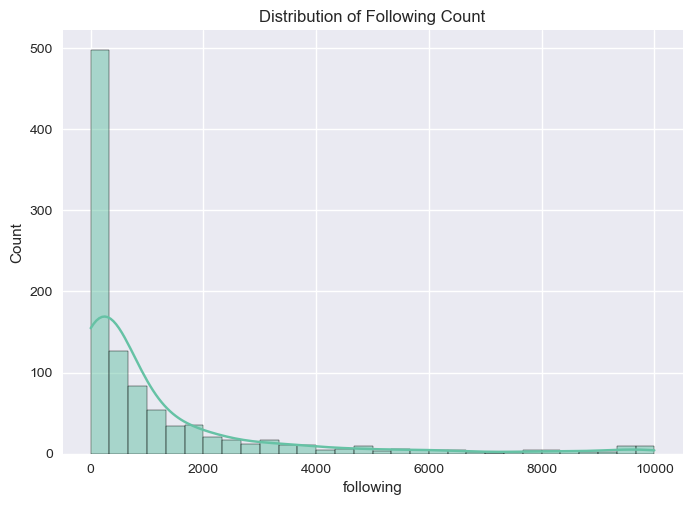

In [36]:
if "following" in df.columns:
    plt.figure()
    sns.histplot(df["following"], bins=30, kde=True)
    plt.title("Distribution of Following Count")
    plt.show()


### Follower-Following Ratio

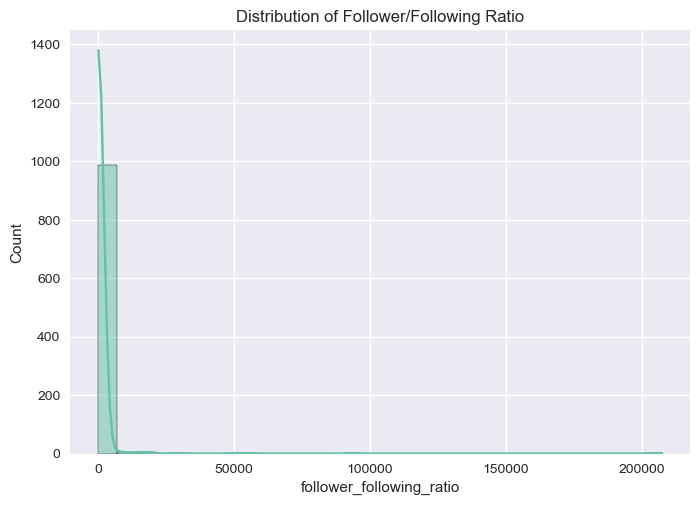

In [38]:
if "followers" in df.columns and "following" in df.columns:
    df["follower_following_ratio"] = df["followers"] / (df["following"]+1)
    plt.figure()
    sns.histplot(df["follower_following_ratio"], bins=30, kde=True)
    plt.title("Distribution of Follower/Following Ratio")
    plt.show()


### Engagement Rate by Verification Status (Boxplot)


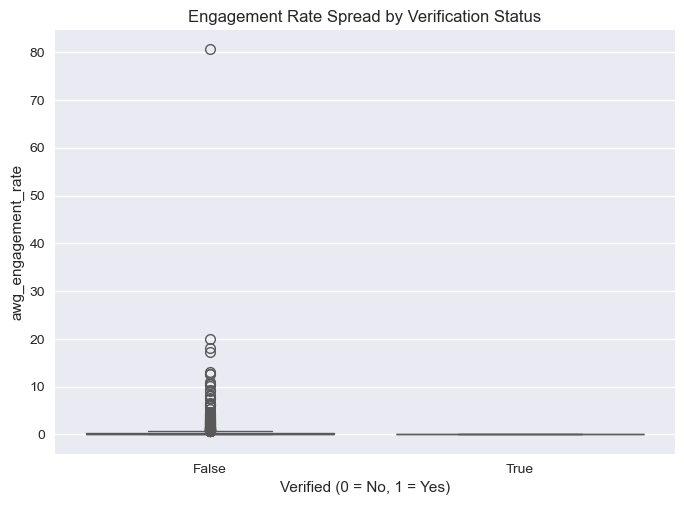

In [39]:
if "is_verified" in df.columns and "awg_engagement_rate" in df.columns:
    plt.figure()
    sns.boxplot(x="is_verified", y="awg_engagement_rate", data=df)
    plt.title("Engagement Rate Spread by Verification Status")
    plt.xlabel("Verified (0 = No, 1 = Yes)")
    plt.show()

### Top 15 Regions by Total Followers

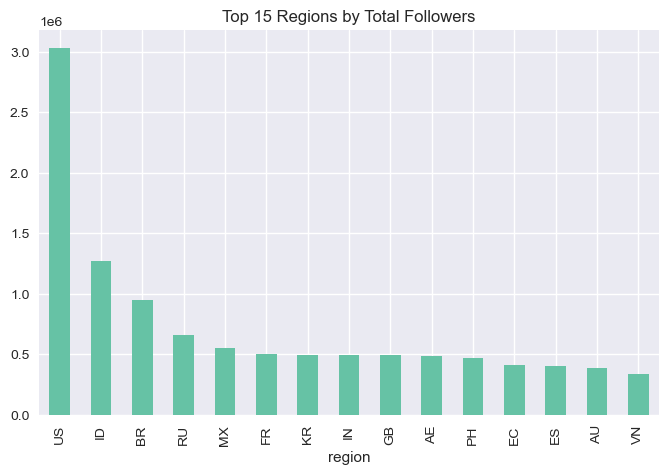

In [40]:
if "followers" in df.columns and "region" in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby("region")["followers"].sum().sort_values(ascending=False).head(15).plot(kind="bar")
    plt.title("Top 15 Regions by Total Followers")
    plt.show()

### Language vs Engagement Rate

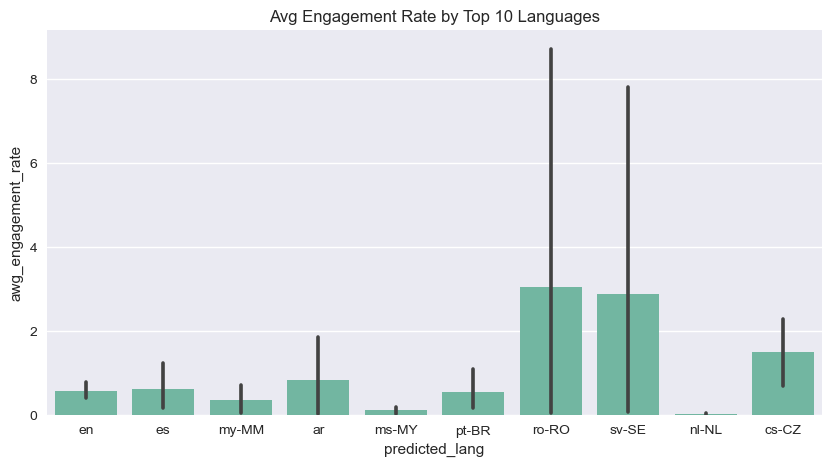

In [41]:
if "predicted_lang" in df.columns and "awg_engagement_rate" in df.columns:
    plt.figure(figsize=(10,5))
    top_langs = df["predicted_lang"].value_counts().head(10).index
    sns.barplot(x="predicted_lang", y="awg_engagement_rate", data=df[df["predicted_lang"].isin(top_langs)])
    plt.title("Avg Engagement Rate by Top 10 Languages")
    plt.show()


### Correlation of Followers, Following, and Engagement Rate

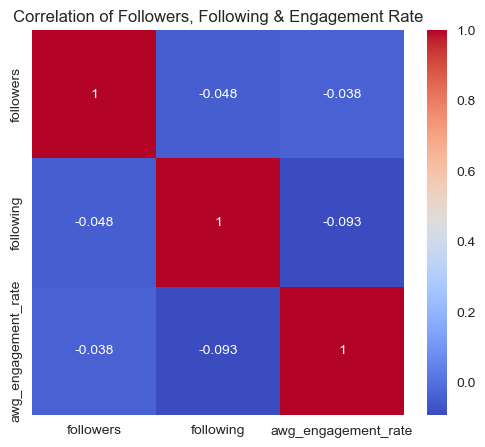

In [42]:
cols = [c for c in ["followers","following","awg_engagement_rate"] if c in df.columns]
if len(cols) > 1:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation of Followers, Following & Engagement Rate")
    plt.show()


### Average engagement for influencers with/without bio link

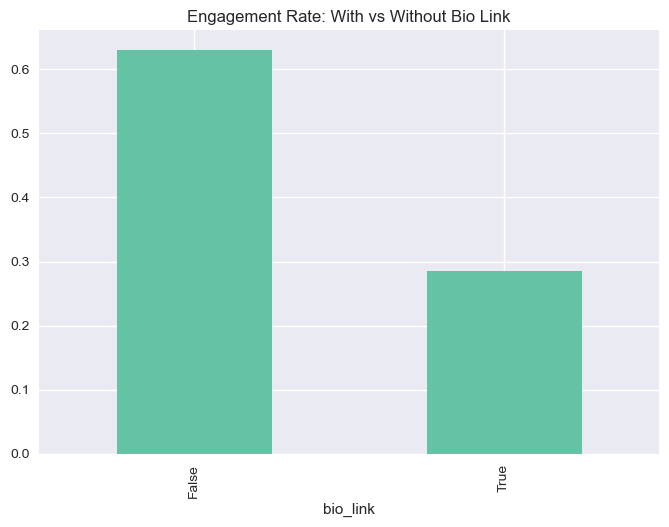

In [45]:
plt.figure()
df.groupby(df["bio_link"].notna())["awg_engagement_rate"].mean().plot(kind="bar")
plt.title("Engagement Rate: With vs Without Bio Link")
plt.show()

### Verified status by region

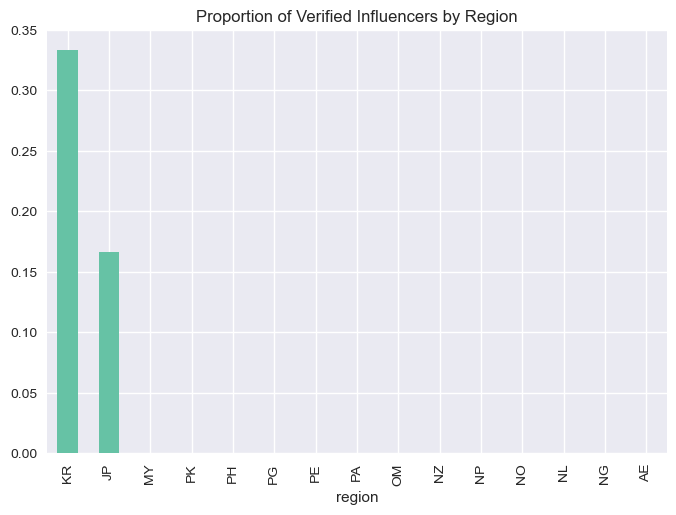

In [46]:
plt.figure()
df.groupby("region")["is_verified"].mean().sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Proportion of Verified Influencers by Region")
plt.show()


### Most common first word in biography

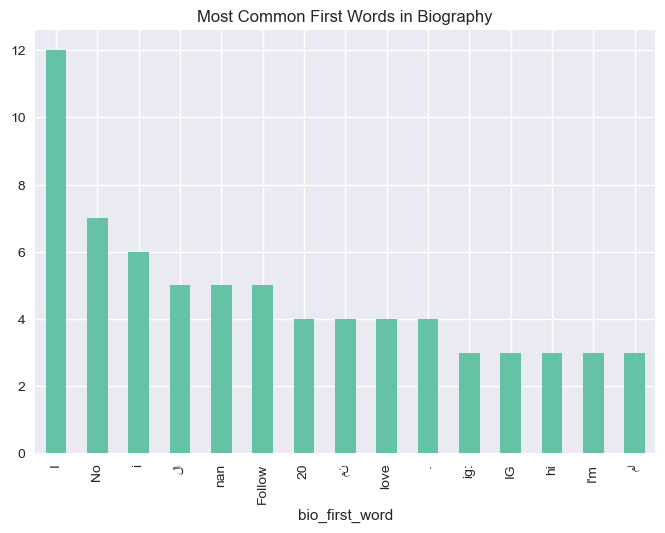

In [47]:
df["bio_first_word"] = df["biography"].astype(str).str.split().str[0]
plt.figure()
df["bio_first_word"].value_counts().head(15).plot(kind="bar")
plt.title("Most Common First Words in Biography")
plt.show()

### Follower growth potential (followers × engagement)

<Figure size 800x550 with 0 Axes>

D:\Users\Diptyajit Sinha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Diptyajit Sinha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


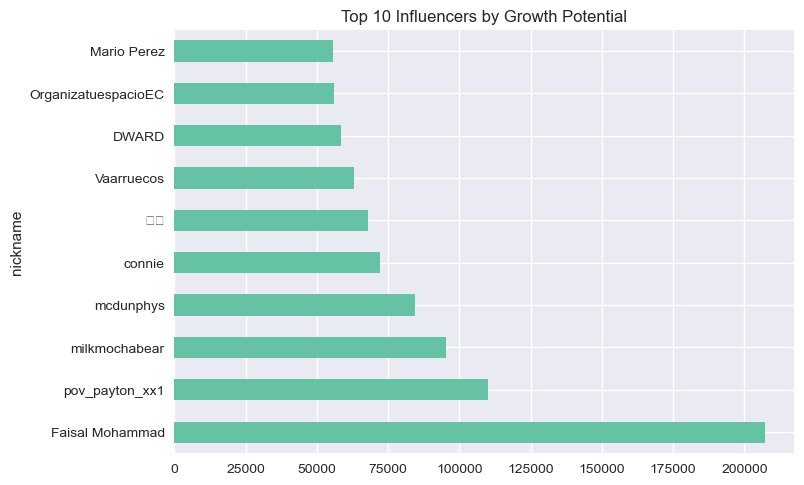

In [48]:
df["growth_potential"] = df["followers"] * df["awg_engagement_rate"]
plt.figure()
df.nlargest(10, "growth_potential")[["nickname","growth_potential"]].set_index("nickname").plot(kind="barh", legend=False)
plt.title("Top 10 Influencers by Growth Potential")
plt.show()

### Average followers by duet setting

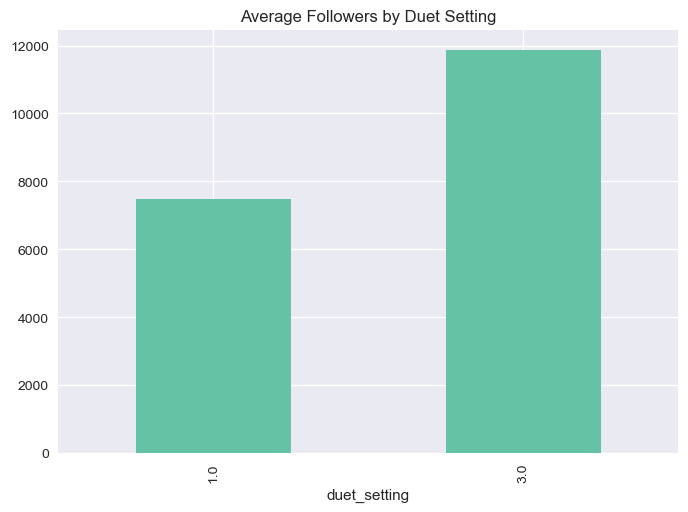

In [49]:
plt.figure()
df.groupby("duet_setting")["followers"].mean().plot(kind="bar")
plt.title("Average Followers by Duet Setting")
plt.show()